In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sys
sys.path.insert(1, '..')
from models.LinearRegressionWithLasso import LinearRegressionWithLasso
from models.metrics import MAE, MAPE, MSE, RMSE

In [2]:
df = pd.read_csv('../data/preprocessing_moldova_cars_task.csv', delimiter=',')
df2 = pd.read_csv('../data/moldova_cars_task.csv', delimiter=',')
df3 = df2

In [3]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(df3['Make'])
df3['Make'] = le1.transform(df3['Make'])

le2 = LabelEncoder()
le2.fit(df3['Model'])
df3['Model'] = le2.transform(df3['Model'])

le3 = LabelEncoder()
le3.fit(df3['Style'])
df3['Style'] = le3.transform(df3['Style'])

le4 = LabelEncoder()
le4.fit(df3['Fuel_type'])
df3['Fuel_type'] = le4.transform(df3['Fuel_type'])

le3 = LabelEncoder()
le3.fit(df3['Transmission'])
df3['Transmission'] = le3.transform(df3['Transmission'])

<AxesSubplot: >

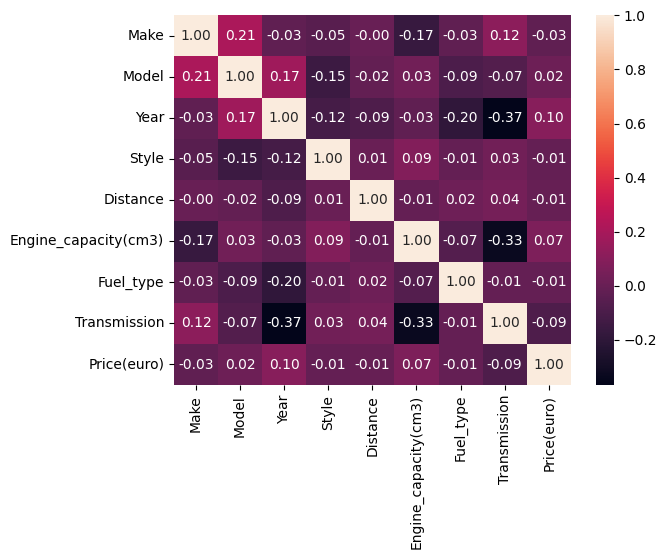

In [4]:
sns.heatmap(df3.corr(), annot=True, fmt='.2f')

<AxesSubplot: >

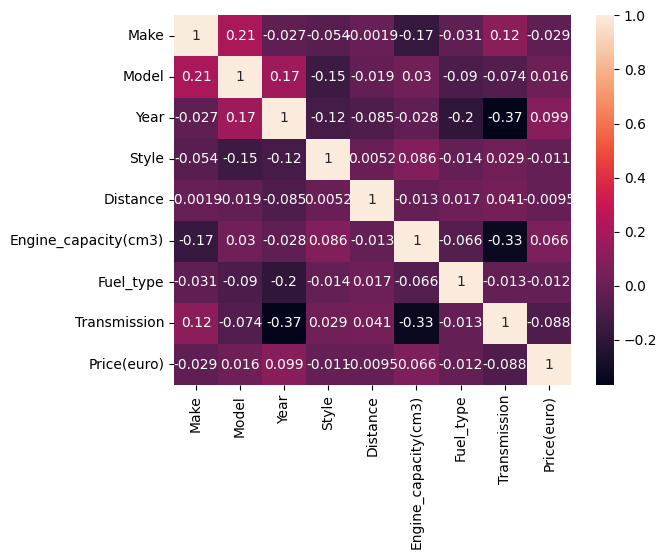

In [5]:
sns.heatmap(df2.corr(), annot=True)

In [6]:
y = df['Price(euro)']

In [7]:
X = df.drop(['Price(euro)'], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
lr1 = LinearRegression().fit(X_train, y_train)
y_pred = lr1.predict(X_test)

In [10]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2', lr1.score(X_test, y_test))

MAE:  4239.348583434803
MAPE:  1.5555729766276039
MSE: 62785015.51046276
RMSE: 7923.699610059859
R2 0.3899421648430016


In [11]:
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X_train)

In [12]:
lr2 = LinearRegression().fit(X_poly, y_train)
y_poly = lr2.predict(X_poly)

In [13]:
print('MAE: ', mean_absolute_error(y_train, y_poly))
print('MAPE: ', mean_absolute_percentage_error(y_train, y_poly))
print('MSE:', mean_squared_error(y_train, y_poly))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2', lr2.score(X_poly, y_train))

MAE:  4865.708451278965
MAPE:  1.7418516362370584
MSE: 3536767475.273823
RMSE: 7923.699610059859
R2 0.01491581828074895


In [14]:
ridge = Ridge(alpha=0.9).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('MAE: ',  mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2', ridge.score(X_test, y_test))

MAE:  4239.2968761584525
MAPE:  1.5555454111803346
MSE: 62783625.06852601
RMSE: 7923.611870133847
R2 0.3899556752322394


/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.57717e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [15]:
parametrs = {'alpha': np.arange(0, 1, 0.1)}

In [16]:
ridge_optimal = GridSearchCV(Ridge(), parametrs).fit(X_train, y_train)
ridge_optimal.best_params_

/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.79583e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.32079e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.11125e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.13301e-19): r

/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.57717e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.9}

In [17]:
ridge_optimal = RandomizedSearchCV(Ridge(), parametrs).fit(X_train, y_train)
ridge_optimal.best_params_

/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.79583e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.32079e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.11125e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.13301e-19): r

/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.94216e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.57717e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.9}

In [18]:
lasso = Lasso(alpha=0.9).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2', lasso.score(X_test, y_test))

MAE:  4238.890365779524
MAPE:  1.5564134497085567
MSE: 62778670.43465428
RMSE: 7923.299214005128
R2 0.390003817502958


/home/todarenko.03/Documents/omstu/4 semester/ML/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.710e+12, tolerance: 1.031e+10
  model = cd_fast.enet_coordinate_descent(


In [19]:
mlr = LinearRegressionWithLasso(0.1)
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
print('MAE: ', MAE(y_test, y_pred))
print('MAPE: ', MAPE(y_test, y_pred))
print('MSE:', MSE(y_test, y_pred))
print('RMSE:', RMSE(y_test, y_pred))
print('R2', mlr.score(X_test, y_test))

MAE:  4201.084621331405
MAPE:  1.5269821467615996
MSE: 62138972.1207335
RMSE: 4201.084621331405
R2 0.3962195198544062


In [20]:
plt.scatter(df['Engine_capacity(cm3)'].values.reshape(-1, 1), df['Price(euro)'].values.reshape(-1, 1), label='Истинные значения')
# plt.plot(df['Year'].values.reshape(-1, 1), lr1.predict(df['Year'].values.reshape(-1, 1)), label="Linear")
# plt.scatter(df['Year'], lr2.predict(X_poly), label='Polynomial')
plt.legend()

In [21]:
plt.scatter(df['Year'].values.reshape(-1, 1), df['Price(euro)'].values.reshape(-1, 1), label='Истинные значения')
# plt.plot(df['Year'].values.reshape(-1, 1), lr1.predict(df['Year'].values.reshape(-1, 1)), label="Linear")
# plt.scatter(df['Year'], lr2.predict(X_poly), label='Polynomial')
plt.legend()

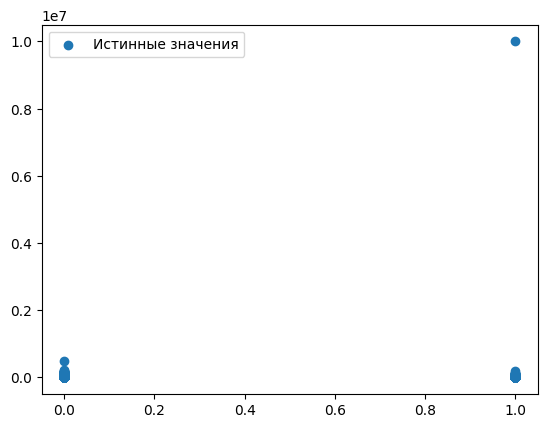

In [22]:
plt.scatter(df['Transmission_Manual'].values.reshape(-1, 1), df['Price(euro)'].values.reshape(-1, 1), label='Истинные значения')
# plt.plot(df['Year'].values.reshape(-1, 1), lr1.predict(df['Year'].values.reshape(-1, 1)), label="Linear")
# plt.scatter(df['Year'], lr2.predict(X_poly), label='Polynomial')
plt.legend()